## Action Recognition Model Training & Testing

In [1]:
import os
from constants import *
import numpy as np

In [2]:
from files_io import readActionLabels, readActionMapping

action_labels = readActionLabels()
action_labels

{'0': 'hello',
 '1': 'good/thank you',
 '2': 'help',
 '3': 'I/me',
 '4': 'please',
 '5': 'sorry',
 '6': 'welcome',
 '7': 'welcome',
 '8': 'ok',
 '9': 'what',
 '10': 'what',
 '11': 'can',
 '12': 'thank you very much',
 '13': 'deaf',
 '14': 'do not',
 '15': 'feel',
 '16': 'eat/food',
 '17': 'eat a lot',
 '18': 'tired',
 '19': 'because',
 '20': 'sick',
 '21': 'drink',
 '22': 'drink',
 '23': 'apple',
 '24': 'banana',
 '25': 'drive',
 '26': 'again',
 '27': 'also',
 '28': 'ask',
 '29': 'yes',
 '30': 'no',
 '31': 'man',
 '32': 'man',
 '33': 'woman',
 '34': 'woman',
 '35': 'he/she',
 '36': 'bad',
 '37': 'have/has/had',
 '38': 'have/has/had',
 '39': 'when',
 '40': 'where',
 '41': 'which',
 '42': 'who',
 '43': 'why',
 '44': 'how',
 '45': 'you',
 '46': 'boy',
 '47': 'girl',
 '48': 'friend',
 '49': 'finish/complete',
 '50': 'find',
 '51': 'other',
 '52': 'forget',
 '53': 'give',
 '54': 'give you',
 '55': 'give me',
 '56': 'go',
 '57': 'get',
 '58': 'understand/comprehend',
 '59': 'use',
 '60': 'wi

In [3]:
action_mapping = readActionMapping()
action_mapping

{'hello': '0',
 'good/thank you': '1',
 'help': '2',
 'I/me': '3',
 'please': '4',
 'sorry': '5',
 'welcome': '7',
 'ok': '8',
 'what': '10',
 'can': '11',
 'thank you very much': '12',
 'deaf': '13',
 'do not': '14',
 'feel': '15',
 'eat/food': '16',
 'eat a lot': '17',
 'tired': '18',
 'because': '19',
 'sick': '20',
 'drink': '22',
 'apple': '23',
 'banana': '24',
 'drive': '25',
 'again': '26',
 'also': '27',
 'ask': '28',
 'yes': '29',
 'no': '30',
 'man': '32',
 'woman': '34',
 'he/she': '35',
 'bad': '36',
 'have/has/had': '38',
 'when': '39',
 'where': '40',
 'which': '41',
 'who': '42',
 'why': '43',
 'how': '44',
 'you': '45',
 'boy': '46',
 'girl': '47',
 'friend': '48',
 'finish/complete': '49',
 'find': '50',
 'other': '51',
 'forget': '52',
 'give': '53',
 'give you': '54',
 'give me': '55',
 'go': '56',
 'get': '57',
 'understand/comprehend': '58',
 'use': '59',
 'will': '60',
 'with': '61',
 'wait': '62',
 'work': '63',
 'they': '64',
 'their': '65',
 'school': '66',
 '

### 1. Preprocess Data

In [4]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [5]:
features, labels = [], []

for action in action_labels:
    folderName = (action + "," + action_labels[action]).replace("/", "_")
    for npyFile in os.listdir(os.path.join(KEYPOINTS_PATH, folderName)):
        load_data = np.load(os.path.join(KEYPOINTS_PATH, folderName, npyFile))
        features.extend(load_data)
        labels.extend(np.full((load_data.shape[0], 1), int(action), dtype=int))


In [6]:
np.array(features).shape

(12200, 20, 240)

In [7]:
np.array(labels).shape

(12200, 1)

In [8]:
X = np.array(features)
X.shape

(12200, 20, 240)

In [9]:
y = to_categorical(labels).astype(int)
y.shape

(12200, 122)

In [10]:
X = X.astype(np.float32)

In [11]:
X.nbytes

234240000

In [12]:
y.nbytes

5953600

In [16]:
X_train = X
y_train = y

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12200, 20, 240)
(3050, 20, 240)
(12200, 122)
(3050, 122)


2. Model Compiling

In [18]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, LayerNormalization, Bidirectional, GRU, TimeDistributed, Attention
from keras.regularizers import l1, l2
from keras.callbacks import TensorBoard

In [19]:
LOG_PATH = os.path.join("log")
tb_callback = TensorBoard(log_dir=LOG_PATH)

In [20]:
modelInputSize = (X.shape[1], X.shape[2])
modelInputSize

(20, 240)

In [43]:
model = Sequential()

l1_param = 0.01
l2_param = 0.1

model.add(
    LSTM(
        units=128,
        input_shape=modelInputSize,
        return_sequences=True,
        # kernel_regularizer=l1(l=l1_param),
        activity_regularizer=l2(l=l2_param),
    )
)
model.add(LayerNormalization())
model.add(Dropout(0.2))

model.add(
    LSTM(
        units=64,
        return_sequences=False,
        # kernel_regularizer=l1(l=l1_param),
        activity_regularizer=l2(l=l2_param),
    )
)
model.add(LayerNormalization())
model.add(Dropout(0.15))

model.add(
    Dense(
        units=64, 
        # kernel_regularizer=l1(l=l1_param), 
        activity_regularizer=l2(l=l2_param)
    )
)
model.add(LayerNormalization())
model.add(Activation("relu"))
# model.add(Dropout(0.15))

model.add(
    Dense(
        units=y.shape[1],
        activation="softmax",
        # kernel_regularizer=l1(l=l1_param),
        activity_regularizer=l2(l=l2_param),
    )
)

In [44]:
# model = Sequential()

# model.add(LSTM(128, input_shape=modelInputSize, return_sequences=True))
# model.add(LayerNormalization())
# model.add(Dropout(0.1))

# model.add(LSTM(64, return_sequences=False))
# model.add(LayerNormalization())
# model.add(Dropout(0.1))

# model.add(Dense(64))
# model.add(LayerNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(Dense(units=y.shape[1], activation='softmax'))


In [45]:
# model = Sequential()
# model.add(LSTM(units=256, activation='relu', dropout=0.2, return_sequences=True, input_shape=modelInputSize))
# model.add(LSTM(units=128, activation='relu', return_sequences=True))
# model.add(LSTM(units=256, activation='relu', return_sequences=False))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=y.shape[1], activation='softmax'))

In [46]:
# model = Sequential()
# model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=modelInputSize))
# model.add(LSTM(units=128, activation='relu', return_sequences=True))
# model.add(LSTM(units=64, activation='relu', return_sequences=False))
# model.add(Dense(units=64, activation='relu'))
# # model.add(Dropout)
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=y.shape[1], activation='softmax'))


In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])

3. Model Training

In [48]:
model.fit(X_train, y_train, epochs=30)
# model.fit(X_train, y_train, epochs=30, callbacks=[tb_callback])

Epoch 1/30
382/382 [==============================] - 16s 27ms/step - loss: 5.6014 - accuracy: 0.0595 - categorical_accuracy: 0.0595
Epoch 2/30
382/382 [==============================] - 10s 27ms/step - loss: 3.0810 - accuracy: 0.3433 - categorical_accuracy: 0.3433
Epoch 3/30
382/382 [==============================] - 10s 27ms/step - loss: 1.7321 - accuracy: 0.6191 - categorical_accuracy: 0.6191
Epoch 4/30
382/382 [==============================] - 10s 27ms/step - loss: 1.1388 - accuracy: 0.7534 - categorical_accuracy: 0.7534
Epoch 5/30
382/382 [==============================] - 10s 27ms/step - loss: 0.8732 - accuracy: 0.8160 - categorical_accuracy: 0.8160
Epoch 6/30
382/382 [==============================] - 11s 28ms/step - loss: 0.6844 - accuracy: 0.8637 - categorical_accuracy: 0.8637
Epoch 7/30
382/382 [==============================] - 11s 29ms/step - loss: 0.5928 - accuracy: 0.8867 - categorical_accuracy: 0.8867
Epoch 8/30
382/382 [==============================] - 11s 28ms/step -

In [49]:
MODEL_PATH = os.path.join("../action_recognition/models")

In [50]:
model.save(os.path.join(MODEL_PATH, 'model_v10_1.keras'))

In [ ]:
from keras.models import load_model
model = load_model(os.path.join(MODEL_PATH, 'model_v8_l2_1.keras'))

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 20, 128)           188928    
                                                                 
 layer_normalization_38 (Lay  (None, 20, 128)          256       
 erNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 20, 128)           0         
                                                                 
 lstm_37 (LSTM)              (None, 64)                49408     
                                                                 
 layer_normalization_39 (Lay  (None, 64)               128       
 erNormalization)                                                
                                                                 
 dropout_31 (Dropout)        (None, 64)              

4. Model Testing

In [ ]:
test_results = model.predict(X_test)

96/96 [==============================] - 2s 14ms/step


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
y_actual = np.argmax(y_test, axis=1)
y_predict = np.argmax(test_results, axis=1)

In [ ]:
accuracy_score(y_actual, y_predict)

0.9845901639344262

In [ ]:
multilabel_confusion_matrix(y_actual, y_predict)

array([[[2997,    0],
        [   3,   25]],

       [[3003,    1],
        [   1,   20]],

       [[2991,    6],
        [   1,   27]],

       [[3005,    5],
        [   0,   15]],

       [[3000,    2],
        [   2,   21]],

       [[3005,    1],
        [   1,   18]],

       [[3003,    2],
        [   1,   19]],

       [[3009,    1],
        [   0,   15]],

       [[3002,    0],
        [   7,   16]],

       [[3005,    0],
        [   8,   12]],

       [[3005,    1],
        [   0,   19]],

       [[2998,    0],
        [   1,   26]],

       [[3001,    0],
        [  10,   14]],

       [[2995,    4],
        [   3,   23]],

       [[2986,    1],
        [   4,   34]],

       [[2991,    2],
        [   4,   28]],

       [[2989,    5],
        [   2,   29]],

       [[3000,    0],
        [   7,   18]],

       [[3000,    0],
        [   1,   24]],

       [[2994,    1],
        [   0,   30]],

       [[3003,    1],
        [   8,   13]],

       [[2999,    4],
        [   

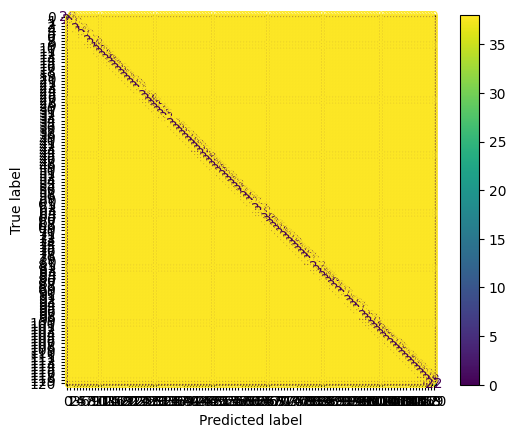

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_actual, y_actual)
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot()
plt.show()

In [68]:
len(y_actual)

3025

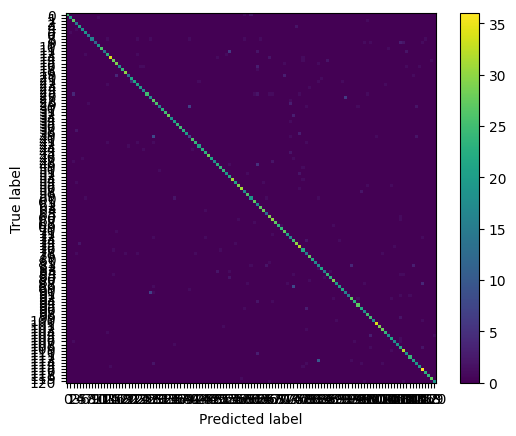

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

test_pm = np.array([1, 2, 3, 4, 5])
cm = confusion_matrix(y_actual, y_predict)
cmDisp = ConfusionMatrixDisplay(confusion_matrix=cm)
cmDisp.plot(include_values=False)
plt.show()

5. Saving Model Weights

In [53]:
MODEL_PATH = os.path.join("../action-recognition/models")

In [95]:
model.save(os.path.join(MODEL_PATH, "model_v2_float16_1.h5"))

# Real time test

In [29]:
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from cvzone.FaceDetectionModule import FaceDetector
from cvzone.PoseModule import PoseDetector
from concurrent.futures import ThreadPoolExecutor
from itertools import chain

class FeatureExtractionModule():
    def __init__(self, **kwargs):
        # Detectors
        self.handDetector = HandDetector(detectionCon=0.5, maxHands=2)
        self.faceDetector = FaceDetector(minDetectionCon=0.5)
        self.poseDetector = PoseDetector(detectionCon=0.5)

    def detectHands(self, handDetector, frame, frameSize, draw):
        results = [0, 0]
        tempResults = []
        # Hand Detection
        if draw:
            tempResults, frame = handDetector.findHands(frame, draw=draw, flipType=False)
        else:
            tempResults = handDetector.findHands(frame, draw=draw, flipType=False)

        if not tempResults:
            results = [self.generate_empty_hand("Left"), self.generate_empty_hand("Right")]
        elif len(tempResults) == 1:
            if tempResults[0]["type"] == "Left":
                results = [self.preprocess_body_part(tempResults[0], frameSize), self.generate_empty_hand("Right")]
            else:
                results = [self.generate_empty_hand("Left"), self.preprocess_body_part(tempResults[0], frameSize)]
        else:
            if tempResults[0]['type'] == 'Right' and tempResults[1]['type'] == 'Left':
                results[0] = tempResults[1]
                results[1] = tempResults[0]
            elif tempResults[0]['type'] == 'Left' and tempResults[1]['type'] == 'Right':
                results[0] = tempResults[0]
                results[1] = tempResults[1]

            # If both detected hands are both left or both right
            elif tempResults[0]['center'][0] > tempResults[1]['center'][0]:
                results[0] = tempResults[1]
                results[1] = tempResults[0]
            else:
                results[0] = tempResults[0]
                results[1] = tempResults[1]

            results[0] = self.preprocess_body_part(results[0], frameSize)
            results[1] = self.preprocess_body_part(results[1], frameSize)

        return results

    # Pose Detection
    # **We only use the first 23 out of the total 33 landmark points
    #   as those represent the lower half body and are irrelevant to sign language interpretation
    def detectPose(self, poseDetector, frame, frameSize, draw):
        frame = poseDetector.findPose(frame, draw=draw)
        if poseDetector.results.pose_landmarks:
            results = np.array([[i.x, i.y, i.z, i.visibility] for i in poseDetector.results.pose_landmarks.landmark[:23]])
            return results.ravel()

        # frame = poseDetector.findPose(frame, draw=draw)
        # results, _ = poseDetector.findPosition(frame, bboxWithHands=False)
        # print('---------------')
        # print('e1', np.array(results)[:, -1])
        # if results:
        #     return np.array(results).flatten()
        #     # return self.preprocess_landmarks(results[:23], frameSize)
        # print('e2', results)
        return np.zeros(92, dtype=float)
        

    # Face Detection
    def detectFace(self, faceDetector, frame, frameSize, draw):
        frame, results = faceDetector.findFaces(frame, draw=draw)
        if results:
            results = self.select_best_matching_face(results, frameSize)
            results["bbox"] = self.preprocess_bbox(results["bbox"], frameSize)
            results["center"] = self.preprocess_center(results["center"], frameSize)
            return results

        return {
            "bbox": np.zeros(4, dtype=float),
            "center": np.zeros(2, dtype=float),
        }

    # Detects hands, face & pose,
    # convert them into normalized landmark/keypoint coordinates in a 1D-array,
    # and also returns the frame with the landmark connections drawn onto it
    def parallelFeatureExtraction(
        self, handDetector, faceDetector, poseDetector, frame, draw=True
    ):
        frameSize = (frame.shape[1], frame.shape[0])
        with ThreadPoolExecutor() as executor:
            t1 = executor.submit(self.detectHands, handDetector, frame, frameSize, draw)
            t2 = executor.submit(self.detectPose, poseDetector, frame, frameSize, draw)
            t3 = executor.submit(self.detectFace, faceDetector, frame, frameSize, draw)

            # Convert results into 1D-array
            detectionResults = self.flatten2dList(
                [
                    self.flattenDetectionResult(t1.result()[0]),
                    self.flattenDetectionResult(t1.result()[1]),
                    t2.result(),
                    t3.result()["bbox"],
                    t3.result()["center"],
                    t3.result()["center"] - t1.result()[0]["center"],
                    t3.result()["center"] - t1.result()[1]["center"],
                ],
                dataType=float,
            )

            return detectionResults, frame

    # Offset and normalize the landmark list
    # Returns a 1d numpy array
    def preprocess_landmarks(self, landmark_list, frameSize):
        np_landmark_list = np.array(landmark_list, dtype=float)
        np_frameSize = np.array([frameSize[0], frameSize[1], frameSize[0]])
        return (np_landmark_list / np_frameSize).ravel()


    # Offset and normalize a BBOX list (BBOX = Bounding Box, used in face and hand detection)
    # Returns a 1d numpy array
    def preprocess_bbox(self, bbox, frameSize):
        bbox = np.array(bbox, dtype=float)
        # Convert 3rd and 4th element into coordinates instead of width/height
        bbox[2] = bbox[0] + bbox[2]
        bbox[3] = bbox[1] + bbox[3]

        # Normalize against frame size
        bbox[0] /= frameSize[0]
        bbox[1] /= frameSize[1]
        bbox[2] /= frameSize[0]
        bbox[3] /= frameSize[1]

        return bbox


    # Normalize a center vertex (a list of 2 elements)
    # Returns a 1d numpy array
    def preprocess_center(self, center, frameSize):
        center = np.array(center, dtype=float)
        center[0] /= frameSize[0]
        center[1] /= frameSize[1]
        return center


    # Preprocess (Offset and normalize) the body's landmark list, bbox and center
    def preprocess_body_part(self, bodyPart, frameSize):
        bodyPart["lmList"] = self.preprocess_landmarks(bodyPart["lmList"], frameSize)
        bodyPart["bbox"] = self.preprocess_bbox(bodyPart["bbox"], frameSize)
        bodyPart["center"] = self.preprocess_center(bodyPart["center"], frameSize)
        return bodyPart


    # Function to generate empty/placeholder data for a hand
    # Used when a hand is not detected in frame
    def generate_empty_hand(self, type):
        return {
            "lmList": np.zeros(63, dtype=float),
            "bbox": np.zeros(4, dtype=float),
            "center": np.zeros(2, dtype=float),
            "type": type,
        }


    # Select the best matching face, aka the one with the best score (clarity)
    # and closest to the center of the screen
    # Since the Neural network will be design to only accept one face
    def select_best_matching_face(self, faces, frameSize):
        if not faces or len(faces) == 0:
            return False
        elif len(faces) == 1:
            return faces[0]

        def difference(a, b):
            return ((a[0] - b[0]) ** 2) + ((a[1] - b[1]) ** 2)

        frameCenter = (frameSize[0] / 2, frameSize[1] / 2)

        best_score = faces[0]
        best_center = faces[0]
        center_diff = difference(faces[0]["center"], frameCenter)

        for each in faces[1:]:
            if difference(each["center"], frameCenter) < center_diff:
                best_center = each
            if each["score"][0] > best_score["score"][0]:
                best_score = each

        if best_center["score"][0] > 0.5:
            return best_center
        return best_score

    # Flatten a 2d np array into 1d array
    def flatten2dList(self, arr, dataType=float):
        return np.fromiter(chain.from_iterable(arr), dataType)

    # Flatten everything
    def flattenDetectionResult(self, obj):
        return np.concatenate([obj["lmList"], obj["bbox"], obj["center"]])


    def extractFeatures(self, frame):
        detectionResults, frame = self.parallelFeatureExtraction(
            self.handDetector, self.faceDetector, self.poseDetector, frame
        )

        return detectionResults, frame


In [36]:
import cv2
import traceback
from collections import deque
from time import time

cam = None
# Read one frame from camera

def readFrame():
    success, frame = cam.read()
    if not success: 
        raise Exception("No Frames Read")
    return cv2.flip(frame, 1)


cam = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

try:
    femodule = FeatureExtractionModule()

    detectionHistory = deque(maxlen=20)
    lastPredictionTime = time()
    predictionCooldown = 3.0
    
    while True:
        # Read from camera
        rawframe = readFrame()

        frame = np.copy(rawframe)

        detectionResults, frame = femodule.extractFeatures(frame)

        detectionHistory.append(detectionResults)
        if len(detectionHistory) == 20 and time() > lastPredictionTime + predictionCooldown:
            predResult = model.predict(
                np.expand_dims(list(detectionHistory), axis=0),
                verbose=0,
                workers=4,
                use_multiprocessing=True,
            )[0]
            predIndex = np.argmax(predResult)
            predLabel = action_labels[str(predIndex)]
            predAccuracy = predResult[predIndex]

            if predLabel == 'NONE':
                lastPredictionTime = time() + 0.1
            
            elif predAccuracy > 0.9:
                print(predLabel, predAccuracy)
                lastPredictionTime = time()
            else:
                
                print(predLabel, predAccuracy)
        
        # Show resulting frame
        cv2.imshow("Sign Language Recognition Prototype", frame)     

        keyPressed = cv2.waitKey(10)
        # Stop Program when pressed 'Esc'
        if (keyPressed == 27):
            raise Exception("Finished")


except Exception as e:
    print(e)
    traceback.print_exc()

finally:
    cam.release()
    cv2.destroyAllWindows()
    del femodule

good/thank you 0.5453088
good/thank you 0.39431232
yesterday 0.44726172
yesterday 0.641409
yesterday 0.7327917
yesterday 0.7047323
yesterday 0.578292
mother 0.63394314
mother 0.86557204
mother 0.890879
mother 0.9656794
eat/food 0.6803818
eat/food 0.6010105
yesterday 0.76682067
yesterday 0.95206344
drink 0.81317693
drink 0.9022987
eat/food 0.99397343
eat/food 0.99637896
good/thank you 0.8238075
good/thank you 0.96813536
drink 0.9983491
yesterday 0.6701791
drink 0.6157581
drink 0.6130203
yesterday 0.5311985
drink 0.71129626
drink 0.95320755
mother 0.567088
mother 0.5200517
eat/food 0.5177579
eat/food 0.6802523
eat/food 0.7811697
eat/food 0.80739003
eat/food 0.7652826
eat/food 0.6661614
eat/food 0.5273912
mother 0.47913617
yesterday 0.9913846
mother 0.87408274
mother 0.87927216
mother 0.88012975
mother 0.875799
mother 0.8913578
mother 0.89892596
mother 0.90625805
father 0.99999845
good/thank you 0.7617927
eat/food 0.33489147
drink 0.4369127
hello 0.71510345
hello 0.9397628
good/thank you 

Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Temp\ipykernel_17284\2386377763.py", line 63, in <module>
    raise Exception("Finished")
Exception: Finished


In [10]:
a = [1,2,3]
type(a) == list

True

In [11]:
" ".join("dsa")

'd s a'